In [1]:
!pip install geopandas

In [2]:
!pip install plotly_express

In [3]:
!pip install folium

In [4]:
#import ray
#import tensorflow as tf

import time
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly_express as px
import folium

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#import dataset
db = pd.read_csv("tracklets.csv")
db

,idtracklet|id1|mmsi1|speed1|course1|heading1|lon1|lat1|ts1|id2|mmsi2|speed2|course2|heading2|lon2|lat2|ts2|id3|mmsi3|speed3|course3|heading3|lon3|lat3|ts3|id4|mmsi4|speed4|course4|heading4|lon4|lat4|ts4|id5|mmsi5|speed5|course5|heading5|lon5|lat5|ts5|route
0,1|4128997|228005700|6.7|175|511|-4.551695|48.3...
1,2|14817869|249104000|8.7|69|69|-4.733975|48.30...
2,3|8618319|228017700|14.6|83.7|86|-4.885512|48....
3,4|16024159|227008170|12.3|125|126|-4.924165|48...
4,5|2144526|228017700|16.5|73.4|73|-4.550415|48....
...,...
795,796|3554186|227730220|19.1|56.9|511|-4.639665|...
796,797|1585479|227005550|23.1|68.9|511|-4.547798|...
797,798|2761022|258316000|12.1|338|332|-5.186498|4...
798,799|5167729|228186700|10.9|104|103|-4.465165|4...


In [6]:
#re-import dataset and set delimiter
db = pd.read_csv("tracklets.csv", sep="|")
db

,idtracklet,id1,mmsi1,speed1,course1,heading1,lon1,lat1,ts1,id2,...,ts4,id5,mmsi5,speed5,course5,heading5,lon5,lat5,ts5,route
0,1,4128997,228005700,6.7,175.0,511,-4.551695,48.344520,1447148032,4129047,...,1447148121,4129188,228005700,3.9,325.8,511,-4.551893,48.343353,1447148153,R_07
1,2,14817869,249104000,8.7,69.0,69,-4.733975,48.301247,1456438812,14817884,...,1456438842,14817927,249104000,8.5,68.5,69,-4.731818,48.301840,1456438851,R_14
2,3,8618319,228017700,14.6,83.7,86,-4.885512,48.404390,1451215056,8618323,...,1451215075,8618335,228017700,14.7,84.3,88,-4.882973,48.404560,1451215081,R_01
3,4,16024159,227008170,12.3,125.0,126,-4.924165,48.405033,1457099514,16024163,...,1457099527,16024186,227008170,12.4,130.0,119,-4.922998,48.404335,1457099531,R_11
4,5,2144526,228017700,16.5,73.4,73,-4.550415,48.351140,1445447976,2144611,...,1445448112,2144738,228017700,16.0,72.7,71,-4.535050,48.354515,1445448122,R_06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,3554186,227730220,19.1,56.9,511,-4.639665,48.315987,1446681907,3554191,...,1446681925,3554214,227730220,19.5,55.2,511,-4.636951,48.317173,1446681932,R_0
796,797,1585479,227005550,23.1,68.9,511,-4.547798,48.351620,1444922333,1585481,...,1444922338,1585485,227005550,23.2,69.3,511,-4.547202,48.351772,1444922338,R_0
797,798,2761022,258316000,12.1,338.0,332,-5.186498,48.084835,1445959658,2761038,...,1445959718,2761117,258316000,12.2,337.0,333,-5.188832,48.088500,1445959727,R_0
798,799,5167729,228186700,10.9,104.0,103,-4.465165,48.318333,1448009887,5167735,...,1448009892,5167744,228186700,10.9,105.0,101,-4.464665,48.318165,1448009893,R_0


In [7]:
#examine dataset
print("---cc---")
print(db.info())

---cc---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   idtracklet  800 non-null    int64  
 1   id1         800 non-null    int64  
 2   mmsi1       800 non-null    int64  
 3   speed1      800 non-null    float64
 4   course1     800 non-null    float64
 5   heading1    800 non-null    int64  
 6   lon1        800 non-null    float64
 7   lat1        800 non-null    float64
 8   ts1         800 non-null    int64  
 9   id2         800 non-null    int64  
 10  mmsi2       800 non-null    int64  
 11  speed2      800 non-null    float64
 12  course2     800 non-null    float64
 13  heading2    800 non-null    int64  
 14  lon2        800 non-null    float64
 15  lat2        800 non-null    float64
 16  ts2         800 non-null    int64  
 17  id3         800 non-null    int64  
 18  mmsi3       800 non-null    int64  
 19  speed3      800 non-

In [8]:
print("Tracklets Rows: ", db.shape[0])
print("Tracklets Columns: ", db.shape[1])

Tracklets Rows:  800
Tracklets Columns:  42


<Axes: >

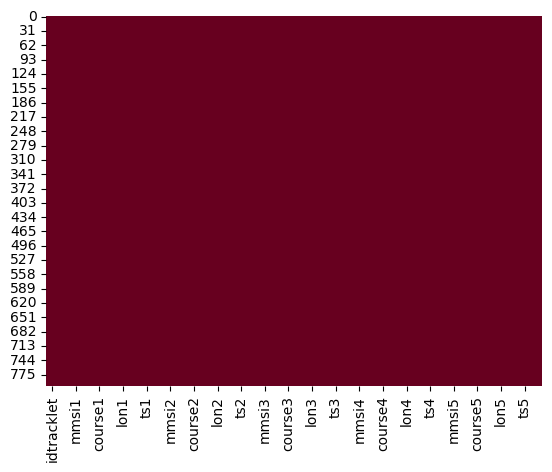

In [9]:
#heatmap to detect null values
sns.heatmap(db.isnull(), cmap="RdBu", cbar=False)

In [10]:
#drop potential na values
db.dropna(inplace=True)
db

,idtracklet,id1,mmsi1,speed1,course1,heading1,lon1,lat1,ts1,id2,...,ts4,id5,mmsi5,speed5,course5,heading5,lon5,lat5,ts5,route
0,1,4128997,228005700,6.7,175.0,511,-4.551695,48.344520,1447148032,4129047,...,1447148121,4129188,228005700,3.9,325.8,511,-4.551893,48.343353,1447148153,R_07
1,2,14817869,249104000,8.7,69.0,69,-4.733975,48.301247,1456438812,14817884,...,1456438842,14817927,249104000,8.5,68.5,69,-4.731818,48.301840,1456438851,R_14
2,3,8618319,228017700,14.6,83.7,86,-4.885512,48.404390,1451215056,8618323,...,1451215075,8618335,228017700,14.7,84.3,88,-4.882973,48.404560,1451215081,R_01
3,4,16024159,227008170,12.3,125.0,126,-4.924165,48.405033,1457099514,16024163,...,1457099527,16024186,227008170,12.4,130.0,119,-4.922998,48.404335,1457099531,R_11
4,5,2144526,228017700,16.5,73.4,73,-4.550415,48.351140,1445447976,2144611,...,1445448112,2144738,228017700,16.0,72.7,71,-4.535050,48.354515,1445448122,R_06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,3554186,227730220,19.1,56.9,511,-4.639665,48.315987,1446681907,3554191,...,1446681925,3554214,227730220,19.5,55.2,511,-4.636951,48.317173,1446681932,R_0
796,797,1585479,227005550,23.1,68.9,511,-4.547798,48.351620,1444922333,1585481,...,1444922338,1585485,227005550,23.2,69.3,511,-4.547202,48.351772,1444922338,R_0
797,798,2761022,258316000,12.1,338.0,332,-5.186498,48.084835,1445959658,2761038,...,1445959718,2761117,258316000,12.2,337.0,333,-5.188832,48.088500,1445959727,R_0
798,799,5167729,228186700,10.9,104.0,103,-4.465165,48.318333,1448009887,5167735,...,1448009892,5167744,228186700,10.9,105.0,101,-4.464665,48.318165,1448009893,R_0


<Axes: >

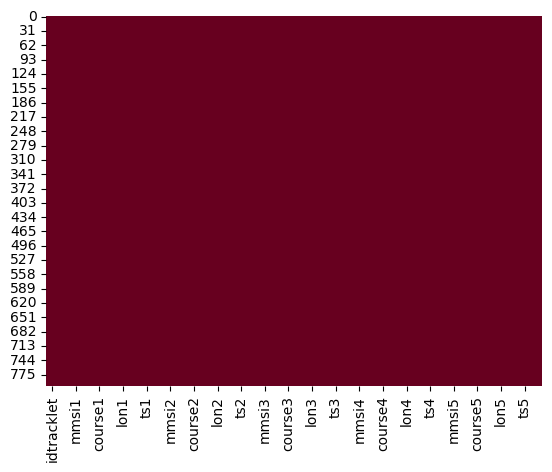

In [11]:
#heatmap to detect null values
sns.heatmap(db.isnull(), cmap="RdBu", cbar=False)

In [12]:
#only needed if you need to read the UNIX timestamps

#process timestamps to human readable format
#db['ts1'] = pd.to_datetime(db['ts1'], unit='s')
#db['ts2'] = pd.to_datetime(db['ts2'], unit='s')
#db['ts3'] = pd.to_datetime(db['ts3'], unit='s')
#db['ts4'] = pd.to_datetime(db['ts4'], unit='s')
#db['ts5'] = pd.to_datetime(db['ts5'], unit='s')
#db

In [13]:
#introduce a correlation matrix
cm = db.corr()

C:\Users\strid\AppData\Local\Temp\ipykernel_12068\1278685546.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = db.corr()


In [14]:
#feature and target selection
features = ['speed1', 'course1', 'heading1', 'ts1', 'speed2', 'course2', 'heading2', 'ts2', 'speed3', 'course3', 'heading3', 'ts3', 'speed4', 'course4', 'heading4', 'ts4', 'speed5', 'course5', 'heading5', 'ts5']  
targets = ['lon1', 'lat1', 'lon2', 'lat2', 'lon3', 'lat3', 'lon4', 'lat4', 'lon5', 'lat5']  

x = db[features]
y = db[targets]

original_lon1 = db["lon1"]
original_lat1 = db["lat1"]

In [15]:
#examine x then y
x

,speed1,course1,heading1,ts1,speed2,course2,heading2,ts2,speed3,course3,heading3,ts3,speed4,course4,heading4,ts4,speed5,course5,heading5,ts5
0,6.7,175.0,511,1447148032,6.9,175.5,511,1447148061,2.8,215.6,511,1447148092,2.1,337.5,511,1447148121,3.9,325.8,511,1447148153
1,8.7,69.0,69,1456438812,8.5,69.1,68,1456438821,8.5,68.3,69,1456438832,8.6,67.9,69,1456438842,8.5,68.5,69,1456438851
2,14.6,83.7,86,1451215056,14.7,83.7,86,1451215063,14.7,83.8,86,1451215069,14.6,84.1,87,1451215075,14.7,84.3,88,1451215081
3,12.3,125.0,126,1457099514,12.6,130.0,125,1457099516,12.8,132.0,124,1457099521,12.5,131.0,121,1457099527,12.4,130.0,119,1457099531
4,16.5,73.4,73,1445447976,16.0,70.3,69,1445448036,15.8,70.5,71,1445448052,16.1,72.8,73,1445448112,16.0,72.7,71,1445448122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,19.1,56.9,511,1446681907,19.5,57.7,511,1446681913,19.9,59.2,511,1446681919,19.0,55.4,511,1446681925,19.5,55.2,511,1446681932
796,23.1,68.9,511,1444922333,23.2,69.1,511,1444922335,23.2,69.3,511,1444922337,23.2,69.7,511,1444922338,23.2,69.3,511,1444922338
797,12.1,338.0,332,1445959658,12.1,338.0,332,1445959667,12.2,338.0,332,1445959677,12.2,337.0,333,1445959718,12.2,337.0,333,1445959727
798,10.9,104.0,103,1448009887,10.9,104.0,102,1448009889,10.9,105.0,102,1448009890,10.9,107.0,101,1448009892,10.9,105.0,101,1448009893


In [16]:
y

,lon1,lat1,lon2,lat2,lon3,lat3,lon4,lat4,lon5,lat5
0,-4.551695,48.344520,-4.551470,48.343616,-4.551337,48.342773,-4.551582,48.342983,-4.551893,48.343353
1,-4.733975,48.301247,-4.733531,48.301365,-4.732932,48.301537,-4.732377,48.301685,-4.731818,48.301840
2,-4.885512,48.404390,-4.884903,48.404434,-4.884294,48.404472,-4.883685,48.404514,-4.882973,48.404560
3,-4.924165,48.405033,-4.923965,48.404915,-4.923698,48.404750,-4.923248,48.404500,-4.922998,48.404335
4,-4.550415,48.351140,-4.544022,48.352585,-4.542357,48.352993,-4.536008,48.354320,-4.535050,48.354515
...,...,...,...,...,...,...,...,...,...,...
795,-4.639665,48.315987,-4.639073,48.316227,-4.638355,48.316505,-4.637738,48.316814,-4.636951,48.317173
796,-4.547798,48.351620,-4.547500,48.351700,-4.547202,48.351772,-4.546900,48.351845,-4.547202,48.351772
797,-5.186498,48.084835,-5.186832,48.085335,-5.187165,48.086000,-5.188498,48.088000,-5.188832,48.088500
798,-4.465165,48.318333,-4.464998,48.318165,-4.464832,48.318165,-4.464665,48.318165,-4.464665,48.318165


In [17]:
#split dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#create linear regression model
lon_model = LinearRegression()
lat_model = LinearRegression()

In [18]:
#fit the model
lon_model.fit(X_train, y_train['lon1'])  #longitude prediction
lat_model.fit(X_train, y_train['lat1'])  #latitude prediction

LinearRegression()

In [19]:
#predict the model
lon_predictions = lon_model.predict(X_test)
lat_predictions = lat_model.predict(X_test)

In [20]:
#predicted longitude and latitude values

#print(lon_predictions)
#print(lat_predictions)

lon_lat_p = pd.DataFrame({
    "Longitude": lon_predictions,
    "Latitude": lat_predictions
})

lon_lat_p

,Longitude,Latitude
0,-4.644427,48.254778
1,-4.777951,48.272358
2,-4.707740,48.307352
3,-4.706132,48.270410
4,-4.671591,48.304778
...,...,...
155,-4.593279,48.296151
156,-4.745788,48.274850
157,-4.589265,48.507345
158,-4.745430,48.275080


In [21]:
from shapely.geometry import Point
#create a geometry column using Point objects from the shapley library
geometry = [Point(lon, lat) for lon, lat in zip(lon_predictions, lat_predictions)]

#create the GeoDataFrame
geo_df = gpd.GeoDataFrame({
    'Longitude': lon_predictions,
    'Latitude': lat_predictions
}, geometry=geometry)

print(geo_df)

     Longitude   Latitude                   geometry
0    -4.644427  48.254778  POINT (-4.64443 48.25478)
1    -4.777951  48.272358  POINT (-4.77795 48.27236)
2    -4.707740  48.307352  POINT (-4.70774 48.30735)
3    -4.706132  48.270410  POINT (-4.70613 48.27041)
4    -4.671591  48.304778  POINT (-4.67159 48.30478)
..         ...        ...                        ...
155  -4.593279  48.296151  POINT (-4.59328 48.29615)
156  -4.745788  48.274850  POINT (-4.74579 48.27485)
157  -4.589265  48.507345  POINT (-4.58927 48.50734)
158  -4.745430  48.275080  POINT (-4.74543 48.27508)
159  -4.618993  48.281659  POINT (-4.61899 48.28166)

[160 rows x 3 columns]


In [22]:
o_geometry = [Point(lon, lat) for lon, lat in zip(original_lon1, original_lat1)]

#create the GeoDataFrame
o_geo_df = gpd.GeoDataFrame({
    'Longitude': original_lon1,
    'Latitude': original_lat1
}, geometry=o_geometry)

print(o_geo_df)

     Longitude   Latitude                   geometry
0    -4.551695  48.344520  POINT (-4.55169 48.34452)
1    -4.733975  48.301247  POINT (-4.73398 48.30125)
2    -4.885512  48.404390  POINT (-4.88551 48.40439)
3    -4.924165  48.405033  POINT (-4.92417 48.40503)
4    -4.550415  48.351140  POINT (-4.55042 48.35114)
..         ...        ...                        ...
795  -4.639665  48.315987  POINT (-4.63966 48.31599)
796  -4.547798  48.351620  POINT (-4.54780 48.35162)
797  -5.186498  48.084835  POINT (-5.18650 48.08483)
798  -4.465165  48.318333  POINT (-4.46516 48.31833)
799  -4.773423  48.041780  POINT (-4.77342 48.04178)

[800 rows x 3 columns]


In [35]:
#data visualisation

#create a map centered around the mean coordinates of the points
mean_coords = geo_df['geometry'].unary_union.centroid
m = folium.Map(location=[mean_coords.y, mean_coords.x], zoom_start=6)
original_color = (255, 0, 0)  # Red
predicted_color = (0, 0, 255)  # Blue

#add original geometry
for index, row in o_geo_df.iterrows():
    lat, lon = row['geometry'].y, row['geometry'].x  # Use 'geometry' here
    folium.Marker([lat, lon], icon=folium.Icon(color='blue')).add_to(m)

#add predictions markers
for index, row in geo_df.iterrows():
    lat, lon = row['geometry'].y, row['geometry'].x
    folium.Marker([lat, lon], icon=folium.Icon(color="red")).add_to(m)

#display the map
#m

Here is a general breakdown on vessel prediction using data visualisation. The abouve could indicate that vessels, in general, are coming into port as the data markers seem to congregate around port areas. However, some outliers show some predictions as being on land - we will analyse a vessel showing some inconsistent results shoiwng "land prediction abnormality" in the next section.

In [37]:
#choose vessel you want to track
selected_mmsi = 227008170  # Replace this with the desired MMSI number

#filter dataset for selected vessel
selected_vessel_data = db[db['mmsi1'] == selected_mmsi]

#feature and target selection
selected_features = ['speed1', 'course1', 'heading1', 'ts1', 'speed2', 'course2', 'heading2', 'ts2', 'speed3', 'course3', 'heading3', 'ts3', 'speed4', 'course4', 'heading4', 'ts4', 'speed5', 'course5', 'heading5', 'ts5']
selected_targets = ['lon1', 'lat1']

x_selected = selected_vessel_data[selected_features]
y_selected = selected_vessel_data[selected_targets]

#split training and testing data
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(x_selected, y_selected, test_size=0.2, random_state=42)

#create linear regression models
lon_model_sel = LinearRegression()
lat_model_sel = LinearRegression()

#fit models
lon_model_sel.fit(X_train_sel, y_train_sel['lon1'])
lat_model_sel.fit(X_train_sel, y_train_sel['lat1'])

#predict models
lon_predictions_sel = lon_model_sel.predict(X_test_sel)
lat_predictions_sel = lat_model_sel.predict(X_test_sel)

#create the DataFrame for the predicted value
lon_lat_p_sel = pd.DataFrame({
    "Longitude": lon_predictions_sel,
    "Latitude": lat_predictions_sel
})

#create thee GeoDataFrame
geometry_sel = [Point(lon, lat) for lon, lat in zip(lon_predictions_sel, lat_predictions_sel)]
geo_df_sel = gpd.GeoDataFrame({
    'Longitude': lon_predictions_sel,
    'Latitude': lat_predictions_sel
}, geometry=geometry_sel)

#create a map centered around the mean coordinates of the points
mean_coords_sel = geo_df_sel['geometry'].unary_union.centroid
m_sel = folium.Map(location=[mean_coords_sel.y, mean_coords_sel.x], zoom_start=6)

#add the GeoDataFrame as your map markers
for index, row in geo_df_sel.iterrows():
    lat, lon = row['geometry'].y, row['geometry'].x

    if index < len(lon_lat_p_sel) // 2:  #using half of the length to differentiate between original and predicted
        color = 'blue'
        label = f"Original {index}"  #add a label for original data
    else:
        color = 'red'
        label = f"Predicted {index - len(lon_lat_p_sel) // 2}"  #subtract half length for predicted data

    folium.Marker([lat, lon], icon=folium.Icon(color=color), popup=folium.Popup(label)).add_to(m_sel)


#cisplay map
m_sel


Here we can see mixed results for this particular individual vessel. If we look at the markers, we can see that Marker 1 has acheived a valid predition ongoing from Marker 0 and going onto Marker 2. However, some Markers are inaccurate in the positioning, showing the ship as being on land, showing some inconsistency in the results.

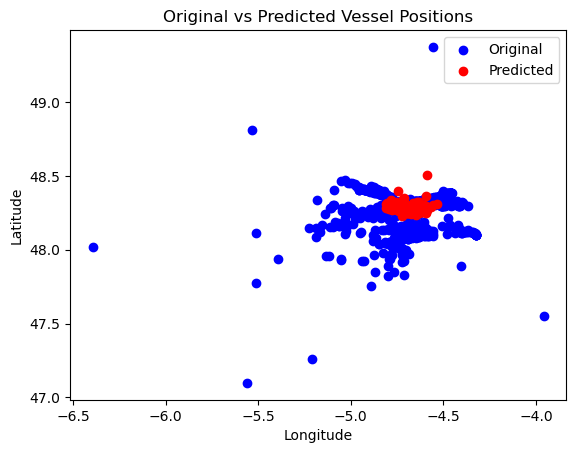

In [25]:
# Scatter plot
plt.scatter(o_geo_df['Longitude'], o_geo_df['Latitude'], color="blue", label='Original')
plt.scatter(geo_df['Longitude'], geo_df['Latitude'], color="red", label='Predicted')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Original vs Predicted Vessel Positions')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [26]:
# Calculate prediction errors
lon_errors = y_test['lon1'] - lon_predictions
lat_errors = y_test['lat1'] - lat_predictions

o_lon_errors = y_test['lon1'] - original_lon1
o_lat_errors = y_test['lat1'] - original_lat1

# Calculate standard deviation of errors
lon_std_dev = np.std(lon_errors)
lat_std_dev = np.std(lat_errors)

o_lon_std_dev = np.std(o_lon_errors)
o_lat_std_dev = np.std(o_lat_errors)

print(f"Longitude Standard Deviation: {lon_std_dev}")
print(f"Latitude Standard Deviation: {lat_std_dev}")
print(f"Original Longitude Standard Deviation: {o_lon_std_dev}")
print(f"Original Latitude Standard Deviation: {o_lat_std_dev}")

Longitude Standard Deviation: 0.18505388384189272
Latitude Standard Deviation: 0.15735459492718393
Original Longitude Standard Deviation: 0.0
Original Latitude Standard Deviation: 0.0


This result indicates the following:
 - The longitude and latidude for the original shows the "true value".
 - On average, it is suggested from the data that the model has a degree of accuracy of 18.5% from the true longitude and 15.7% degrees from the true latitude. 

In [27]:
#model evaluation
lon_mse = mean_squared_error(y_test['lon1'], lon_predictions)
lat_mse = mean_squared_error(y_test['lat1'], lat_predictions)
print(f"Longitude MSE: {lon_mse}")
print(f"Latitude MSE: {lat_mse}")

Longitude MSE: 0.03425331291556322
Latitude MSE: 0.02506316151179916


The MSE (Mean Squared Error) results could indicate the following:
 - For both longitude and latitude values, the above results indicate that the model´s predicted values are relatively close to the original values, indicating quality and that the model is performing well.

In [28]:
#RMSE evaluation
#perform k-fold cross-validation
lon_predictions_cv = cross_val_predict(lon_model_sel, x_selected, y_selected['lon1'], cv=5)
lat_predictions_cv = cross_val_predict(lat_model_sel, x_selected, y_selected['lat1'], cv=5)

lon_rmse = np.sqrt(mean_squared_error(y_selected['lon1'], lon_predictions_cv))
lat_rmse = np.sqrt(mean_squared_error(y_selected['lat1'], lat_predictions_cv))

print(f"Longitude RMSE: {lon_rmse}")
print(f"Latitude RMSE: {lat_rmse}")


Longitude RMSE: 0.22644512562002597
Latitude RMSE: 0.0652141465574302


The fact that the RMSE results are relatively low for latitude and somewhat low for longitude could suggest that the model is performing somewhat well.

In [29]:
#R-squared evaluation
lon_r2 = r2_score(y_selected['lon1'], lon_predictions_cv)
lat_r2 = r2_score(y_selected['lat1'], lat_predictions_cv)

print(f"Longitude R-squared: {lon_r2}")
print(f"Latitude R-squared: {lat_r2}")

Longitude R-squared: -2.9300212311712586
Latitude R-squared: -2.210264387248147


The above indicates that the model is not a good fit for the current data, the data could be being overfitted, underfitted or simply not capturing the underlying patterns assosiated with the data. This could indicate that there was a problem during feature selection, model selection or another preprocessing problem. This result only implies more that we should try other models and evaluate their results.